In [ ]:
Carga de datos

In [19]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="uuDrRwgrAxZYNsnhkcsv")
project = rf.workspace("proyecto-ia-sb8s4").project("amputations")
version = project.version(1)
dataset = version.download("yolov8", location="D:/amput")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
Clasificación de datos

In [20]:
import os
import shutil

# Rutas
IMAGES_DIR = r"D:/amput/train/images"
LABELS_DIR = r"D:/amput/train/labels"
OUTPUT_DIR = r"D:/clasificacion"  # Carpeta de salida (puedes cambiarla)

# Nombres de las clases (en orden como aparecen en data.yaml)
CLASSES = [
    "full_body",
    "left_arm_amputation",
    "left_leg_amputation",
    "right_arm_amputation",
    "right_leg_amputation"
]

# Crea las carpetas de salida
for c in CLASSES:
    os.makedirs(os.path.join(OUTPUT_DIR, c), exist_ok=True)

# Recorre todos los archivos de etiquetas
for label_file in os.listdir(LABELS_DIR):
    if not label_file.endswith(".txt"):
        continue
    label_path = os.path.join(LABELS_DIR, label_file)
    with open(label_path, "r") as f:
        lines = f.readlines()
        if not lines:
            continue  # Sin objetos, omitir
        first_line = lines[0]
        class_index = int(first_line.split()[0])
        class_name = CLASSES[class_index]

    basename = os.path.splitext(label_file)[0]
    found = False
    for ext in [".jpg", ".jpeg", ".png"]:
        image_path = os.path.join(IMAGES_DIR, basename + ext)
        if os.path.exists(image_path):
            dest_path = os.path.join(OUTPUT_DIR, class_name, basename + ext)
            try:
                shutil.copy(image_path, dest_path)
                found = True
            except Exception as e:
                print(f"Error copiando {image_path} → {dest_path}: {e}")
            break
    if not found:
        print(f"[WARN] Imagen no encontrada para: {basename} (.jpg/.jpeg/.png)")


Error copiando D:/amput/train/images\disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-different-body-mock-up-space_590464-138484_png.rf.52196eb7f1dc89c3465f91ed3ef0a79b.jpg → D:/clasificacion\right_arm_amputation\disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-different-body-mock-up-space_590464-138484_png.rf.52196eb7f1dc89c3465f91ed3ef0a79b.jpg: [Errno 2] No such file or directory: 'D:/clasificacion\\right_arm_amputation\\disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-different-body-mock-up-space_590464-138484_png.rf.52196eb7f1dc89c3465f91ed3ef0a79b.jpg'
[WARN] Imagen no encontrada para: disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-

In [16]:
import os
import shutil

IMAGES_DIR = r"D:/amput/train/images"
LABELS_DIR = r"D:/amput/train/labels"
OUTPUT_DIR = r"D:/clasificacion"

CLASSES = [
    "full_body",
    "left_arm_amputation",
    "left_leg_amputation",
    "right_arm_amputation",
    "right_leg_amputation"
]

# Crea las carpetas de salida
for c in CLASSES:
    os.makedirs(os.path.join(OUTPUT_DIR, c), exist_ok=True)

not_found_count = 0  # Contador de archivos faltantes
not_found_list = []  # Lista de los archivos faltantes (opcional)

for label_file in os.listdir(LABELS_DIR):
    if not label_file.endswith(".txt"):
        continue
    label_path = os.path.join(LABELS_DIR, label_file)
    with open(label_path, "r") as f:
        lines = f.readlines()
        if not lines:
            continue  # Sin objetos, omitir
        first_line = lines[0]
        class_index = int(first_line.split()[0])
        class_name = CLASSES[class_index]

    basename = os.path.splitext(label_file)[0]
    found = False
    for ext in [".jpg", ".jpeg", ".png"]:
        image_path = os.path.join(IMAGES_DIR, basename + ext)
        if os.path.exists(image_path):
            dest_path = os.path.join(OUTPUT_DIR, class_name, basename + ext)
            try:
                shutil.copy(image_path, dest_path)
                found = True
            except Exception as e:
                print(f"Error copiando {image_path} → {dest_path}: {e}")
            break
    if not found:
        not_found_count += 1
        not_found_list.append(basename)
        print(f"[WARN] Imagen no encontrada para: {basename} (.jpg/.jpeg/.png)")

print(f"\nTotal de imágenes NO encontradas: {not_found_count}")
if not_found_count > 0:
    print("Lista de imágenes faltantes (solo primeros 10):", not_found_list[:10])


Error copiando D:/amput/train/images\disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-different-body-mock-up-space_590464-138484_png.rf.52196eb7f1dc89c3465f91ed3ef0a79b.jpg → D:/clasificacion\right_arm_amputation\disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-different-body-mock-up-space_590464-138484_png.rf.52196eb7f1dc89c3465f91ed3ef0a79b.jpg: [Errno 2] No such file or directory: 'D:/clasificacion\\right_arm_amputation\\disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-different-body-mock-up-space_590464-138484_png.rf.52196eb7f1dc89c3465f91ed3ef0a79b.jpg'
[WARN] Imagen no encontrada para: disability-unique-arm-amputee-man-with-injury-showing-forearm-with-mockup-isolated-disabled-model-white-background-male-person-pose-with-

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    shear_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    "D:/clasificacion",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    "D:/clasificacion",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 595 images belonging to 5 classes.
Found 146 images belonging to 5 classes.


In [ ]:
Balance de clases

In [22]:
import os

DATA_DIR = "D:/clasificacion"
class_counts = {}

for c in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, c)
    if os.path.isdir(class_path):
        n_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[c] = n_images

print("Imágenes por clase:", class_counts)
max_count = max(class_counts.values())
print("Cantidad objetivo por clase:", max_count)


Imágenes por clase: {'full_body': 197, 'left_arm_amputation': 189, 'left_leg_amputation': 96, 'right_arm_amputation': 160, 'right_leg_amputation': 99}
Cantidad objetivo por clase: 197


In [23]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img, save_img

augmenter = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    shear_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

target_per_class = max_count

for class_name, n_images in class_counts.items():
    class_dir = os.path.join(DATA_DIR, class_name)
    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    img_idx = 0
    gen_count = 0

    while n_images + gen_count < target_per_class:
        # Rota entre las imágenes originales
        img_file = images[img_idx % len(images)]
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # Genera solo una imagen sintética por iteración
        aug_iter = augmenter.flow(x, batch_size=1)
        aug_img = next(aug_iter)[0].astype('uint8')
        aug_img_pil = array_to_img(aug_img)

        new_name = f"aug_{gen_count}_{img_file}"
        save_img(os.path.join(class_dir, new_name), aug_img_pil)

        gen_count += 1
        img_idx += 1

    print(f"{class_name}: {n_images} originales, {gen_count} sintéticas agregadas.")


full_body: 197 originales, 0 sintéticas agregadas.
left_arm_amputation: 189 originales, 8 sintéticas agregadas.
left_leg_amputation: 96 originales, 101 sintéticas agregadas.
right_arm_amputation: 160 originales, 37 sintéticas agregadas.
right_leg_amputation: 99 originales, 98 sintéticas agregadas.


In [24]:
# Repite el conteo
class_counts_final = {}
for c in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, c)
    if os.path.isdir(class_path):
        n_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        class_counts_final[c] = n_images
print("Balance final por clase:", class_counts_final)


Balance final por clase: {'full_body': 197, 'left_arm_amputation': 197, 'left_leg_amputation': 197, 'right_arm_amputation': 197, 'right_leg_amputation': 197}


In [ ]:
Primer modelo MobileNetV2 + Fine-Tuning

In [58]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Cargar MobileNetV2 base (preentrenada, sin la cabeza final)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Congelamos para primer entrenamiento

# Capa superior personalizada y regularización
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,620,997 (10.00 MB)

 Trainable params: 362,245 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [ ]:
Callbacks y Entrenamiento Inicial

In [59]:
checkpoint = ModelCheckpoint(
    "mobilenetv2_best.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-7
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=40,
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Epoch 1/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.2988 - loss: 2.2716
Epoch 1: val_accuracy improved from -inf to 0.41781, saving model to mobilenetv2_best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 614ms/step - accuracy: 0.3014 - loss: 2.2593 - val_accuracy: 0.4178 - val_loss: 1.4621 - learning_rate: 0.0010
Epoch 2/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.4791 - loss: 1.6109
Epoch 2: val_accuracy improved from 0.41781 to 0.43836, saving model to mobilenetv2_best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 520ms/step - accuracy: 0.4798 - loss: 1.6071 - val_accuracy: 0.4384 - val_loss: 1.4950 - learning_rate: 0.0010
Epoch 3/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5329 - loss: 1.3986
Epoch 3: val_accuracy improved from 0.43836 to 0.51370, saving model to mobilenetv2_best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.5325 - loss: 1.3980 - val_accuracy: 0.5137 - val_loss: 1.3571 - learning_rate: 0.0010
Epoch 4/40
19/19 ━━━━━━━━━━━━━━━━━

In [ ]:
Fine-Tuning: Descongelar Últimas Capas

In [60]:
# Ahora liberamos las últimas 50 capas del base_model para ajustar más al dataset
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.5544 - loss: 1.2038
Epoch 1: val_accuracy did not improve from 0.61644
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 670ms/step - accuracy: 0.5541 - loss: 1.2054 - val_accuracy: 0.5548 - val_loss: 1.2737 - learning_rate: 1.0000e-05
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.5748 - loss: 1.2061
Epoch 2: val_accuracy did not improve from 0.61644
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 608ms/step - accuracy: 0.5742 - loss: 1.2051 - val_accuracy: 0.5822 - val_loss: 1.2954 - learning_rate: 1.0000e-05
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.5816 - loss: 1.0763
Epoch 3: val_accuracy improved from 0.61644 to 0.62329, saving model to mobilenetv2_best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 631ms/step - accuracy: 0.5807 - loss: 1.0800 - val_accuracy: 0.6233 - val_loss: 1.2800 - learning_rate: 1.0000e-05
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5545 - loss: 1.1313
Epoch 4: val_accuracy

In [ ]:
Evaluación y Matriz de Confusión

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.7443 - loss: 0.7647

Mejor modelo guardado - Loss: 1.1255, Accuracy: 60.27%
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step


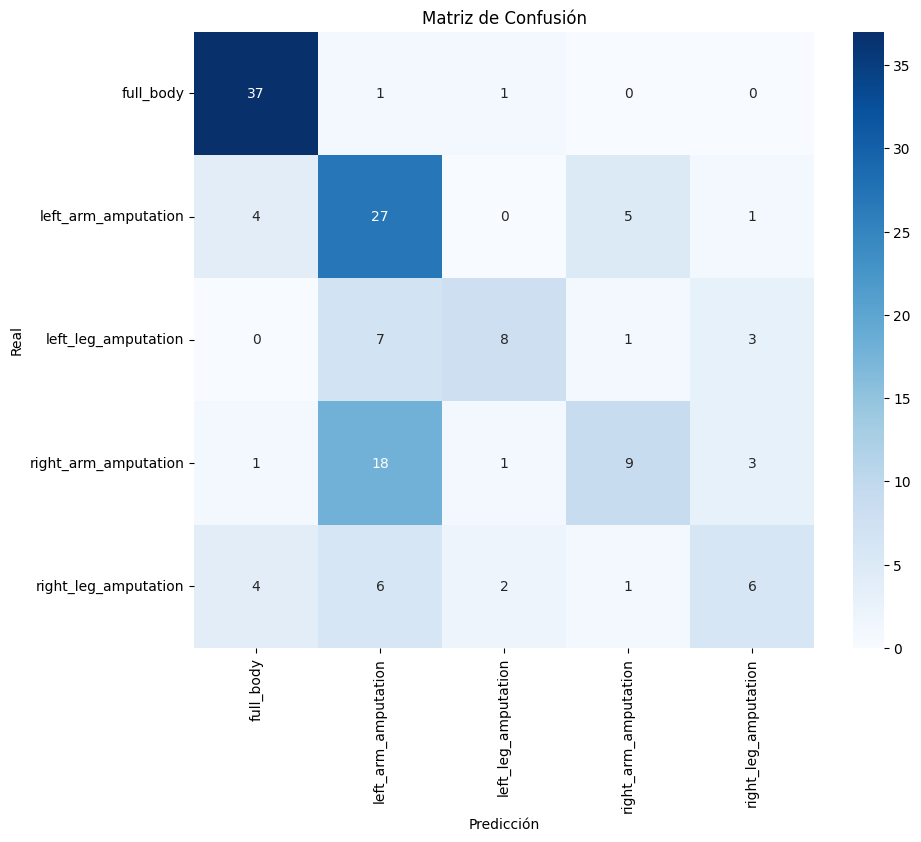


                       precision    recall  f1-score   support

           full_body       0.80      0.95      0.87        39
 left_arm_amputation       0.46      0.73      0.56        37
 left_leg_amputation       0.67      0.42      0.52        19
right_arm_amputation       0.56      0.28      0.38        32
right_leg_amputation       0.46      0.32      0.38        19

            accuracy                           0.60       146
           macro avg       0.59      0.54      0.54       146
        weighted avg       0.60      0.60      0.57       146



In [61]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carga el mejor modelo guardado
best_model = load_model("mobilenetv2_best.keras")

# Evalúa en validación
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"\nMejor modelo guardado - Loss: {val_loss:.4f}, Accuracy: {val_acc*100:.2f}%")

# Predicciones para matriz de confusión
Y_pred = best_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte detallado
print("\n", classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
Extra: Mejor Accuracy de Validación

In [62]:
max_acc = max(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
print(f"Mejor accuracy en validación durante el entrenamiento: {max_acc*100:.2f}%")

Mejor accuracy en validación durante el entrenamiento: 62.33%


In [ ]:
Post Entrenamiento

In [13]:
# BLOQUE 1: Carga de datos (idéntico al que ya usas)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    shear_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    "D:/clasificacion",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_generator = train_datagen.flow_from_directory(
    "D:/clasificacion",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 790 images belonging to 5 classes.
Found 195 images belonging to 5 classes.


In [14]:
# BLOQUE 2: Fine-tuning a partir del modelo ganador

from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# 1. Carga el mejor modelo que tienes
model = load_model("mobilenetv2_best_finetune.keras")

# 2. Descongela TODAS las capas para ajuste final profundo
for layer in model.layers:
    layer.trainable = True

# 3. Compila con un learning rate bajo para refinar (prueba 1e-6 para más suavidad si se estanca)
model.compile(
    optimizer=Adam(learning_rate=3e-6),  # Puedes ajustar a 1e-6 o 5e-6 según resultados
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Callbacks actualizados (guarda con nombre diferente para evitar sobreescribir)
checkpoint = ModelCheckpoint(
    "mobilenetv2_best_finetune_post.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,  # Puedes subir/bajar según evolución
    restore_best_weights=True
)
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=7,
    verbose=1,
    min_lr=1e-8
)

# 5. Entrenamiento post-fine-tuning
history_post = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=60,   # Puedes ajustar según tiempo disponible
    callbacks=[checkpoint, early_stop, lr_reduce]
)


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4733 - loss: 1.4977
Epoch 1: val_accuracy improved from -inf to 0.58974, saving model to mobilenetv2_best_finetune_post.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.4735 - loss: 1.4982 - val_accuracy: 0.5897 - val_loss: 1.4259 - learning_rate: 3.0000e-06
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4693 - loss: 1.5452
Epoch 2: val_accuracy did not improve from 0.58974
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4701 - loss: 1.5438 - val_accuracy: 0.5897 - val_loss: 1.4065 - learning_rate: 3.0000e-06
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5179 - loss: 1.3858
Epoch 3: val_accuracy did not improve from 0.58974
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5178 - loss: 1.3870 - val_accuracy: 0.5846 - val_loss: 1.5098 - learning_rate: 3.0000e-06
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5286 - loss: 1.3006
Epoch 4: val_accuracy did not i

In [ ]:
Evaluacion y metricas del modelo mejorado

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.6876 - loss: 0.9615

Mejor modelo guardado - Loss: 1.3403, Accuracy: 58.46%
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 390ms/step


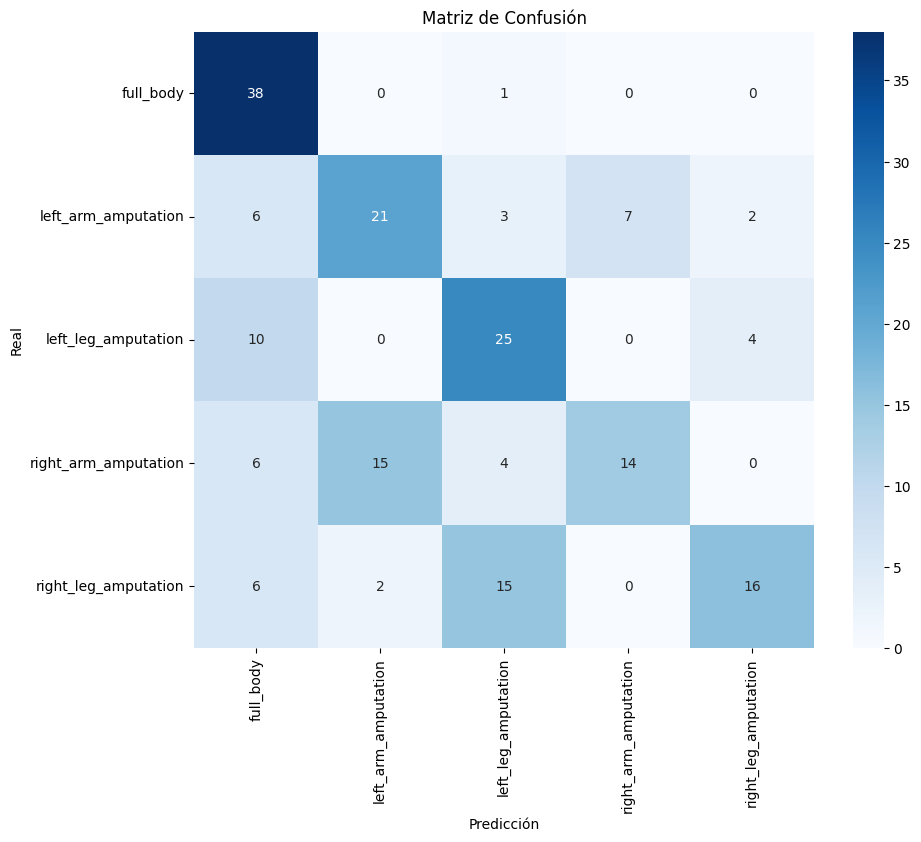


                       precision    recall  f1-score   support

           full_body       0.58      0.97      0.72        39
 left_arm_amputation       0.55      0.54      0.55        39
 left_leg_amputation       0.52      0.64      0.57        39
right_arm_amputation       0.67      0.36      0.47        39
right_leg_amputation       0.73      0.41      0.52        39

            accuracy                           0.58       195
           macro avg       0.61      0.58      0.57       195
        weighted avg       0.61      0.58      0.57       195



NameError: name 'history_post' is not defined

In [4]:
# BLOQUE 3: Evaluación del nuevo modelo postentrenamiento

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carga el mejor modelo post-fine-tuning
best_model = load_model("mobilenetv2_best_finetune.keras")

val_loss, val_acc = best_model.evaluate(val_generator)
print(f"\nMejor modelo guardado - Loss: {val_loss:.4f}, Accuracy: {val_acc*100:.2f}%")

Y_pred = best_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print("\n", classification_report(y_true, y_pred, target_names=class_names))

# Extra: Mejor accuracy logrado
max_acc_post = max(history_post.history['val_accuracy'])
print(f"Mejor accuracy en validación (post-entrenamiento): {max_acc_post*100:.2f}%")


In [ ]:
Probar el ultimo modelo guardado


Imagen: 06_clip_image035.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 989ms/step


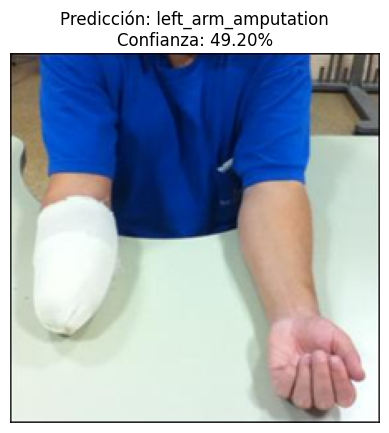

Clase predicha: left_arm_amputation (Confianza: 49.20%)

Imagen: 1-s2.0-S1293296514673072-gr27.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


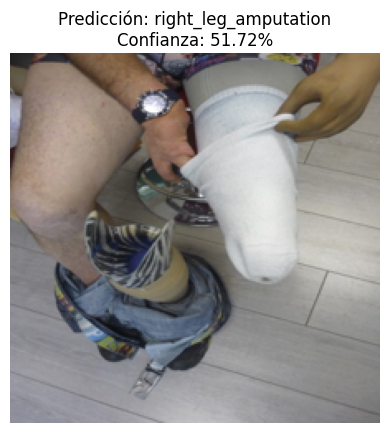

Clase predicha: right_leg_amputation (Confianza: 51.72%)

Imagen: 20090611004206-brazo-amputado.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


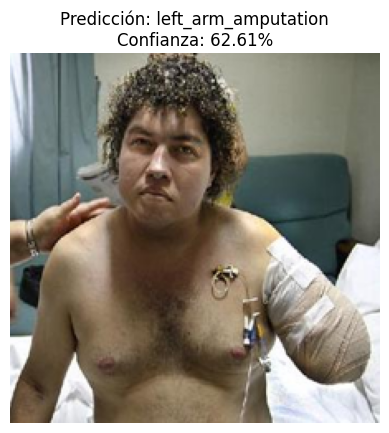

Clase predicha: left_arm_amputation (Confianza: 62.61%)

Imagen: CkljTwwXEAUVpYj.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


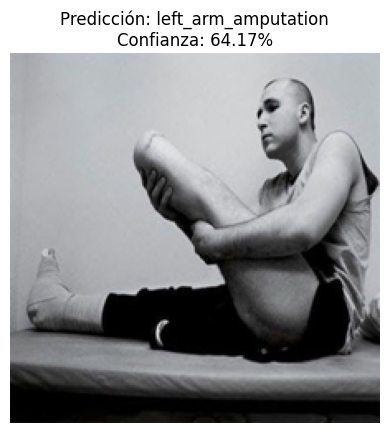

Clase predicha: left_arm_amputation (Confianza: 64.17%)

Imagen: depositphotos_325728000-stock-photo-bk-amputation-with-elastic-bandage.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


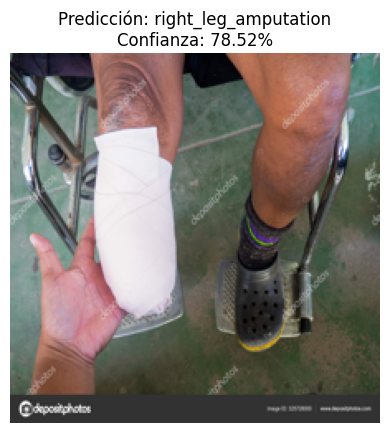

Clase predicha: right_leg_amputation (Confianza: 78.52%)

Imagen: images.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


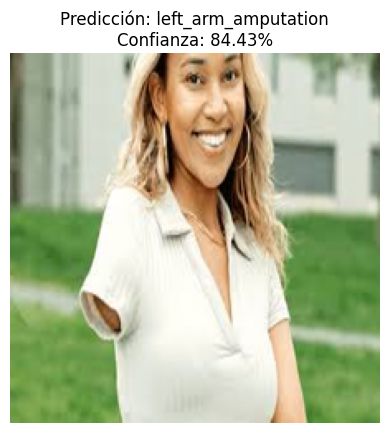

Clase predicha: left_arm_amputation (Confianza: 84.43%)

Imagen: Screenshot 2025-06-23 223339.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


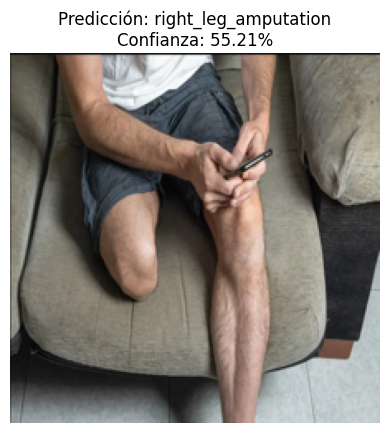

Clase predicha: right_leg_amputation (Confianza: 55.21%)

Imagen: Screenshot 2025-06-23 223550.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


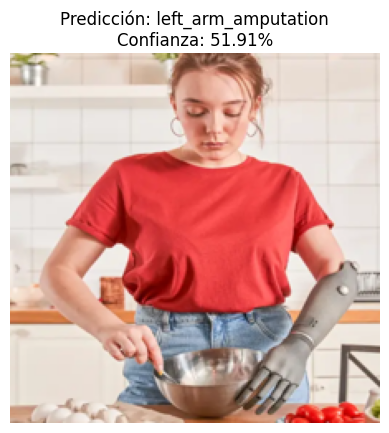

Clase predicha: left_arm_amputation (Confianza: 51.91%)


In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Carga el modelo entrenado
model = load_model("mobilenetv2_best_finetune.keras")

# Nombres de clases en el mismo orden que el modelo fue entrenado
class_names = [
    'full_body', 
    'left_arm_amputation', 
    'left_leg_amputation', 
    'right_arm_amputation', 
    'right_leg_amputation'
]  # <-- Escribe tu lista real aquí

def predict_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)[0]
    class_name = class_names[pred_class]
    conf = np.max(pred) * 100

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicción: {class_name}\nConfianza: {conf:.2f}%")
    plt.show()
    print(f"Clase predicha: {class_name} (Confianza: {conf:.2f}%)")

# --- Predecir todas las imágenes de la carpeta ---
folder = r"D:/amputaciones extra"
for fname in os.listdir(folder):
    if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif')):
        print(f"\nImagen: {fname}")
        predict_image(os.path.join(folder, fname))


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Debe coincidir con tu división original
)

val_generator = val_datagen.flow_from_directory(
    "D:/clasificacion",         # Ajusta si tu ruta es diferente
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False              # ¡Importante! No barajar para mantener el orden de las etiquetas
)


Found 195 images belonging to 5 classes.


In [3]:
from tensorflow.keras.models import load_model

# Carga el último modelo guardado
model = load_model("mobilenetv2_best_finetune.keras")

# Evalúa en el set de validación
val_loss, val_acc = model.evaluate(val_generator)
print(f"Accuracy del modelo (validación): {val_acc*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.6876 - loss: 0.9615
Accuracy del modelo (validación): 58.46%


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.6876 - loss: 0.9615

Accuracy del modelo en validación: 58.46%
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step


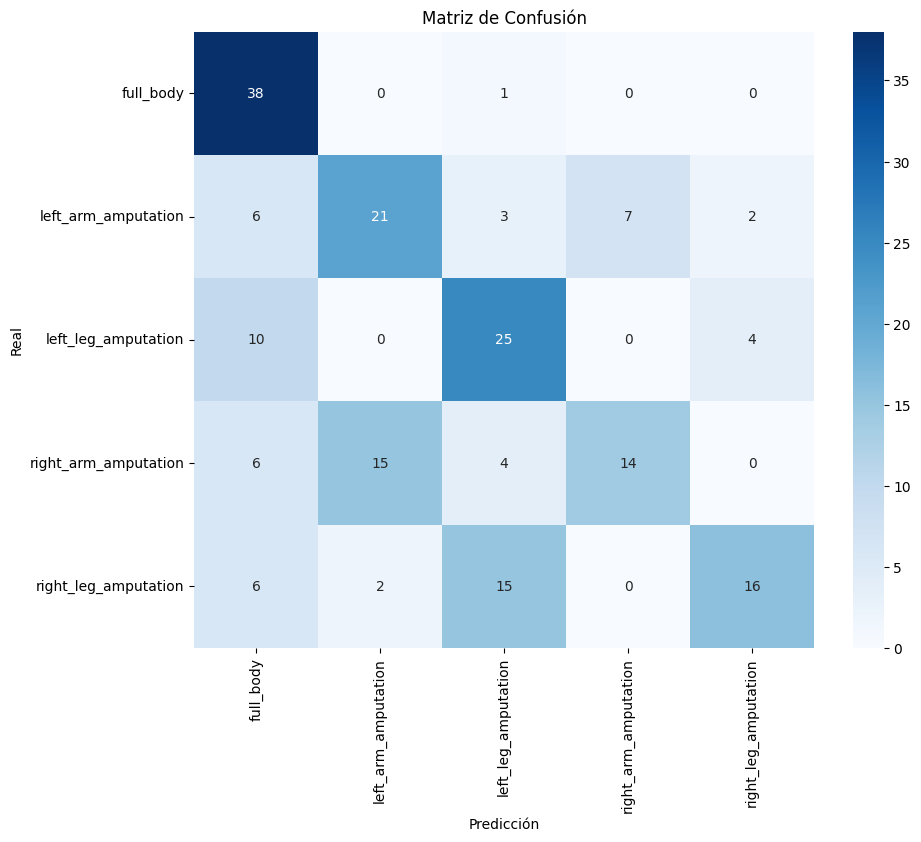

                      precision    recall  f1-score   support

           full_body       0.58      0.97      0.72        39
 left_arm_amputation       0.55      0.54      0.55        39
 left_leg_amputation       0.52      0.64      0.57        39
right_arm_amputation       0.67      0.36      0.47        39
right_leg_amputation       0.73      0.41      0.52        39

            accuracy                           0.58       195
           macro avg       0.61      0.58      0.57       195
        weighted avg       0.61      0.58      0.57       195



In [5]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carga el mejor modelo post-fine-tuning
best_model = load_model("mobilenetv2_best_finetune.keras")  # O el nombre correcto

# 2. Evalúa en el set de validación
val_loss, val_acc = best_model.evaluate(val_generator)
print(f"\nAccuracy del modelo en validación: {val_acc*100:.2f}%")

# 3. Predicciones y métricas detalladas
Y_pred = best_model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# 4. Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 5. Reporte detallado
print(classification_report(y_true, y_pred, target_names=class_names))
